#3.0 Data Preprocessing

## Setup, Import, Load Dataset

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import ADASYN


path = kagglehub.dataset_download("oktayrdeki/heart-disease")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease' dataset.
Path to dataset files: /kaggle/input/heart-disease


In [ ]:
# ###If you dont want set default string(none)then uncomment
# #Load dataset
# print("Path to dataset files:", path)
# df = pd.read_csv("/kaggle/input/heart-disease/heart_disease.csv")
# df.head(5)

In [ ]:
df = pd.read_csv(
    path + "//heart_disease.csv",
    keep_default_na=False,  # don’t treat default strings like "None", "NA" as NaN
    na_values=[""]          # only treat truly empty cells as NaN
)

df.head(5)


Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

## Check Missing Value

In [ ]:
df.isnull().sum()

Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

## Missing Value HeatMap

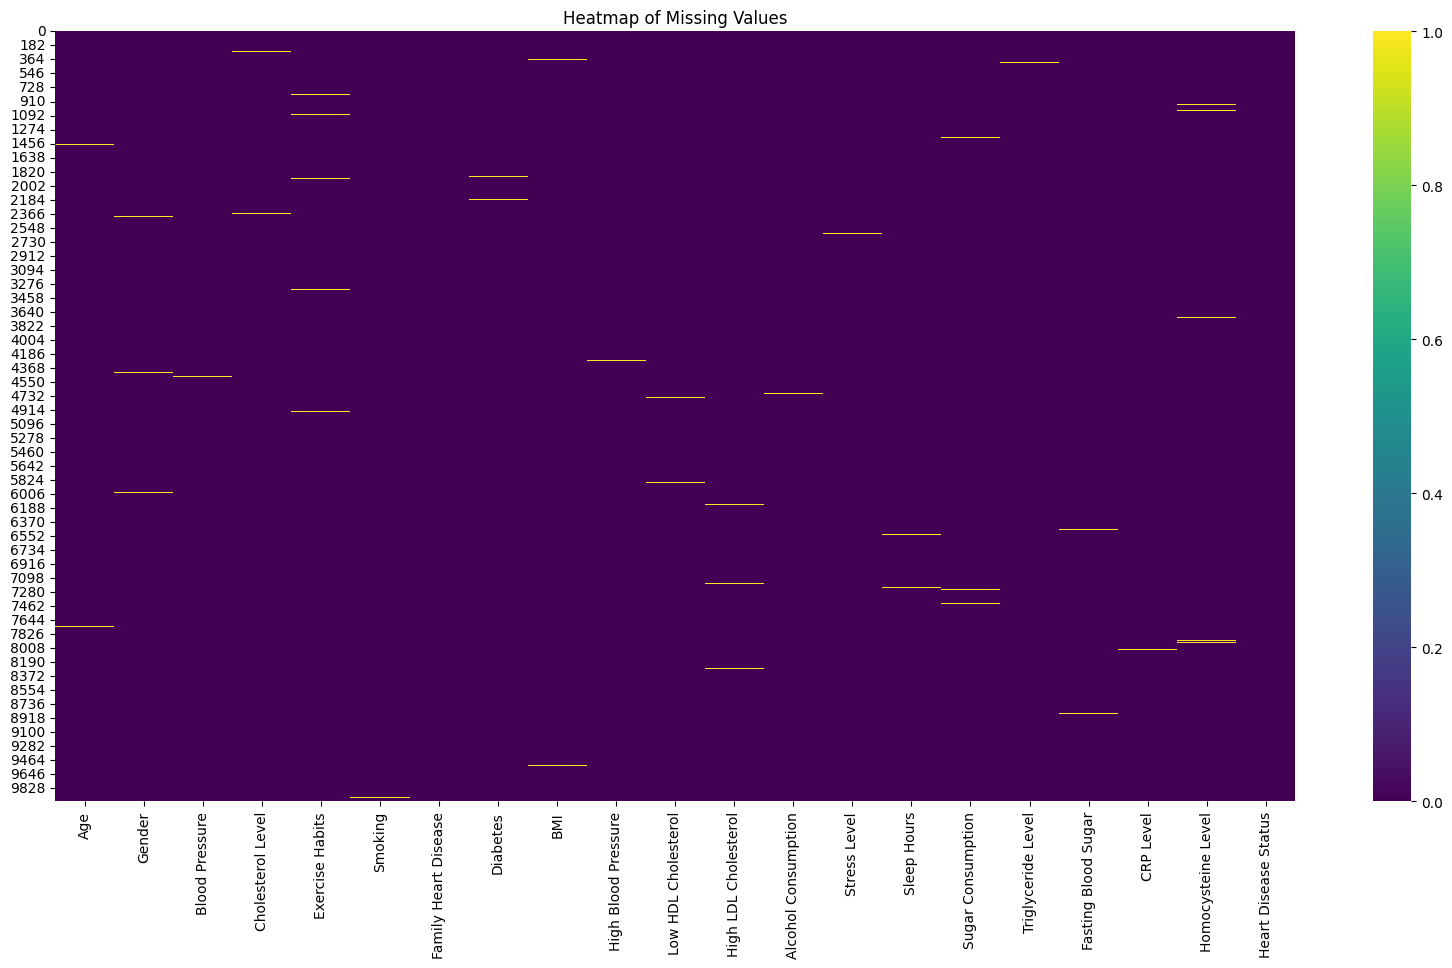

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

## Filling Missing


df - keep alcohol consumption Nan and imputation

df_clean - keep alcohol consumption NaN and NOT imputation

In [ ]:
# Use Median to fill numeric columns
num_cols = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"{col} | Median Fill Value: {median_val}")

# Use Mode to fill categorical columns
cat_cols = [
    'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
    'Stress Level', 'Sugar Consumption', 'Alcohol Consumption'
]
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"{col} | Mode Fill Value: {mode_val}")


Age | Median Fill Value: 49.0
Blood Pressure | Median Fill Value: 150.0
Cholesterol Level | Median Fill Value: 226.0
BMI | Median Fill Value: 29.079491590086043
Sleep Hours | Median Fill Value: 7.003252334814371
Triglyceride Level | Median Fill Value: 250.0
Fasting Blood Sugar | Median Fill Value: 120.0
CRP Level | Median Fill Value: 7.472164393020417
Homocysteine Level | Median Fill Value: 12.409395381646618
Gender | Mode Fill Value: Male
Exercise Habits | Mode Fill Value: High
Smoking | Mode Fill Value: Yes
Family Heart Disease | Mode Fill Value: No
Diabetes | Mode Fill Value: No
High Blood Pressure | Mode Fill Value: Yes
Low HDL Cholesterol | Mode Fill Value: Yes
High LDL Cholesterol | Mode Fill Value: No
Stress Level | Mode Fill Value: Medium
Sugar Consumption | Mode Fill Value: Low
Alcohol Consumption | Mode Fill Value: None


In [ ]:
##Drop Row is have include NaN
# num_cols = [
#     'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
#     'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
# ]

# cat_cols = [
#     'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
#     'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
#     'Stress Level', 'Sugar Consumption', 'Alcohol Consumption'
# ]

# # Drop rows with NaN in either numeric or categorical columns
# df = df.dropna(subset=num_cols + cat_cols)

# print(f"After dropping NaN rows: {df.shape}")

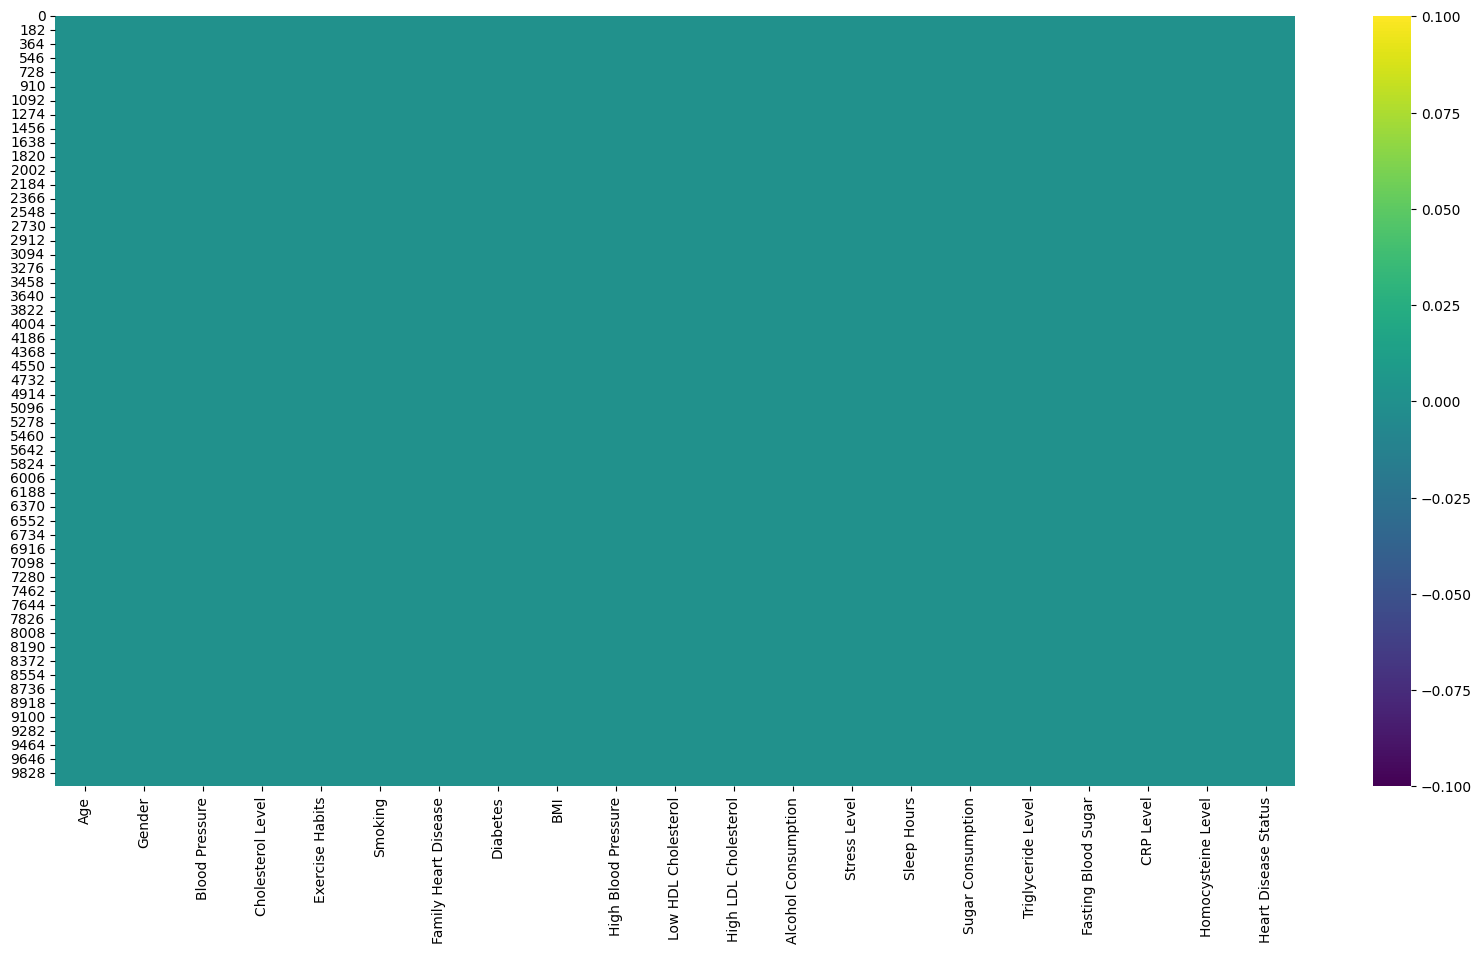

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.show()

## Manual Label Encoding

In [ ]:
binary_map = {'No': 0, 'Yes': 1}

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Smoking'] = df['Smoking'].map(binary_map)
df['Family Heart Disease'] = df['Family Heart Disease'].map(binary_map)
df['Diabetes'] = df['Diabetes'].map(binary_map)
df['High Blood Pressure'] = df['High Blood Pressure'].map(binary_map)
df['Low HDL Cholesterol'] = df['Low HDL Cholesterol'].map(binary_map)
df['High LDL Cholesterol'] = df['High LDL Cholesterol'].map(binary_map)
df['Heart Disease Status'] = df['Heart Disease Status'].map(binary_map)

order_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Exercise Habits'] = df['Exercise Habits'].str.strip().map(order_map)
df['Stress Level'] = df['Stress Level'].str.strip().map(order_map)
df['Sugar Consumption'] = df['Sugar Consumption'].str.strip().map(order_map)

#because "None" = "No drink" Instead of Missing Value
alcohol_map_cleaned = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}
df['Alcohol Consumption'] = df['Alcohol Consumption'].str.strip().map(alcohol_map_cleaned)

In [ ]:
df.head()

Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0       1           153.0              155.0                3        1   
1  69.0       0           146.0              286.0                3        0   
2  46.0       1           126.0              216.0                1        0   
3  32.0       0           122.0              293.0                3        1   
4  60.0       1           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                     1         0  24.991591                    1  ...   
1                     1         1  25.221799                    0  ...   
2                     0         0  29.855447                    0  ...   
3                     1         0  24.130477                    1  ...   
4                     1         1  20.486289                    1  ...   

   High LDL Cholesterol  Alcohol Consumption  Stress Level  Sleep Hours  \
0                     0                    3             2     7.633228   
1                     0                    2             3     8.744034   
2                     1                    1             1     4.440440   
3                     1                    1             3     5.249405   
4                     0                    1             3     7.030971   

   Sugar Consumption  Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                  2               342.0                120.0  12.969246   
1                  2               133.0                157.0   9.355389   
2                  1               393.0                 92.0  12.709873   
3                  3               293.0                 94.0  12.509046   
4                  3               263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                     0  
1           19.298875                     0  
2           11.230926                     0  
3            5.961958                     0  
4            8.153887                     0  

[5 rows x 21 columns]

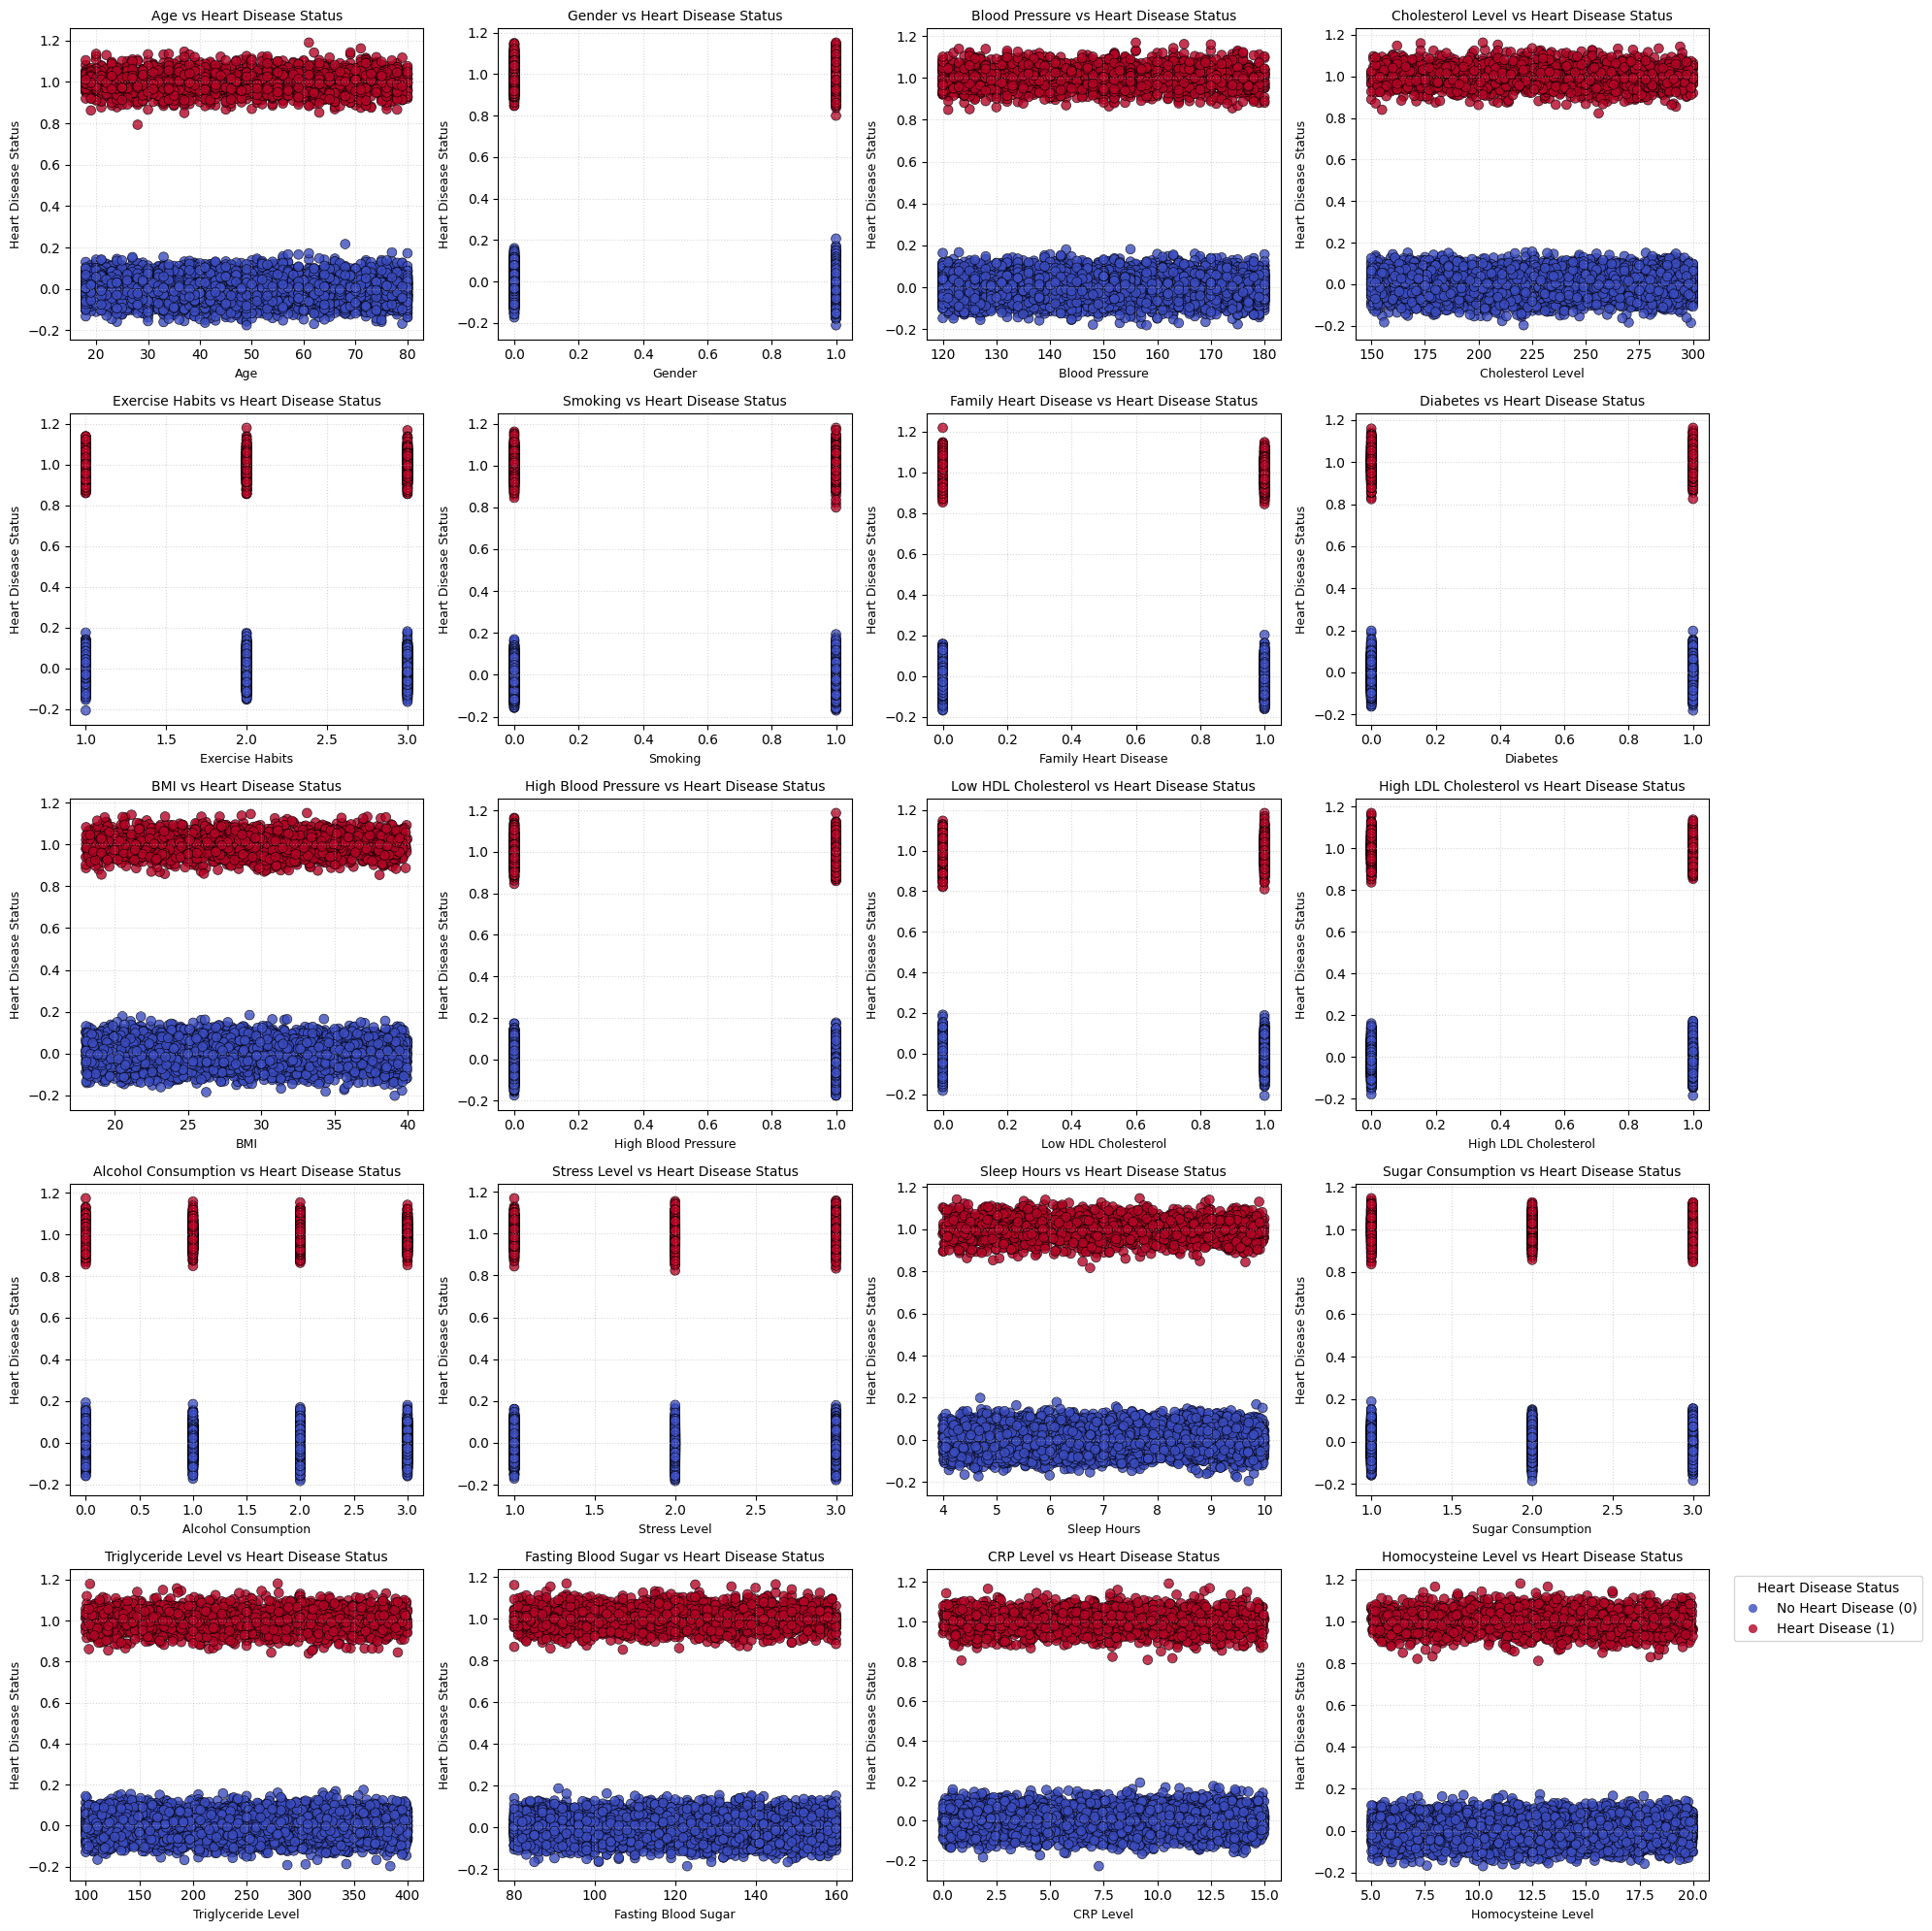

In [ ]:
target = "Heart Disease Status"
variables = [c for c in df.columns if c != target]

n_vars = len(variables)
ncols = 4
nrows = int(np.ceil(n_vars / ncols))

plt.figure(figsize=(ncols*5, nrows*4))

for i, var in enumerate(variables, 1):
    x = df[var].values.astype(float)
    y = df[target].values.astype(int)
    y_jitter = y + np.random.normal(0, 0.05, size=y.shape)

    plt.subplot(nrows, ncols, i)
    scatter = plt.scatter(
        x,
        y_jitter,
        c=y,                 # target
        cmap="coolwarm",
        alpha=0.8,
        s=50,
        edgecolors="black",
        linewidths=0.5
    )
    plt.xlabel(var, fontsize=9)
    plt.ylabel(target, fontsize=9)
    plt.title(f"{var} vs {target}", fontsize=10)
    plt.grid(True, linestyle=":", alpha=0.5)

handles, labels = scatter.legend_elements(prop="colors", alpha=0.8)
plt.legend(
    handles,
    ["No Heart Disease (0)", "Heart Disease (1)"],
    title="Heart Disease Status",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1241281126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1241281126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1241281126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1241281126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1241281126.py:3: FutureWarning: 

Passing `pa

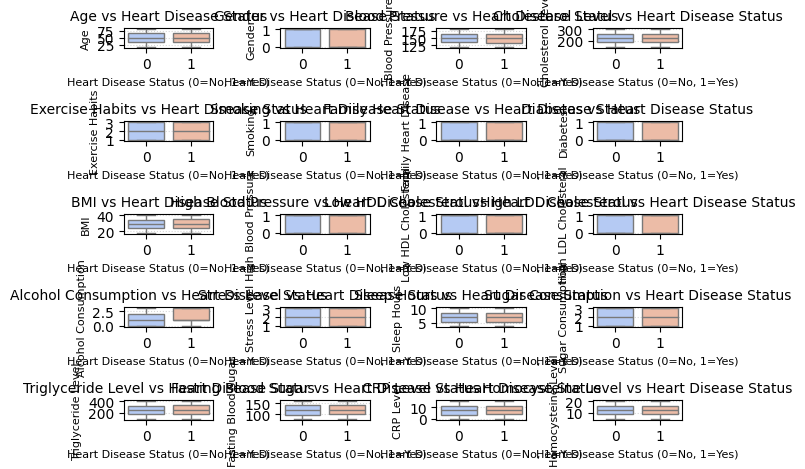

In [ ]:
for i, var in enumerate(variables, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(
        data=df,
        x=target,
        y=var,
        palette="coolwarm"
    )
    plt.title(f"{var} vs {target}", fontsize=10)
    plt.xlabel("Heart Disease Status (0=No, 1=Yes)", fontsize=8)
    plt.ylabel(var, fontsize=8)
    plt.grid(True, linestyle=":", alpha=0.5)

plt.tight_layout()
plt.show()


## Check Outlier

In [ ]:
# Function to detect outliers using Z-score for a specific column
# General rule of thumb is when data
def detect_outliers_z_score(data, threshold=3 ):
    z_scores = (data - data.mean()) / data.std()      #   Calculate z-score for each
    # print(z_scores)
    outliers = (np.abs(z_scores) > threshold).any(axis=1)

    return outliers

In [ ]:
numerical_cols = df.select_dtypes(include=['float64']).columns

# Detect outliers for each numeric column
outliers = detect_outliers_z_score(df[numerical_cols])

# Print indices of rows containing outliers
outlier_indices = df.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))

Index of rows with outliers: []
Count of outliers: 0


## Feature Creation

In [ ]:
df['Age_BloodPressure_Interaction'] = df['Age'] * df['Blood Pressure']
epsilon = 1e-6
df['BMI_Cholesterol_Ratio'] = df['BMI'] / (df['Cholesterol Level'] + epsilon)
df['Stress_Sleep_Interaction'] = df['Stress Level'] * df['Sleep Hours']
df['Lifestyle_Score'] = (
    df['Exercise Habits'] * 1.5 -
    df['Smoking'] * 2 -
    df['Alcohol Consumption'] * 1.5 -
    df['Stress Level'] * 1 +
    df['Sugar Consumption'] * 1 +
    df['Sleep Hours'] * (-1)
)

In [ ]:
df.head()

Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0       1           153.0              155.0                3        1   
1  69.0       0           146.0              286.0                3        0   
2  46.0       1           126.0              216.0                1        0   
3  32.0       0           122.0              293.0                3        1   
4  60.0       1           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                     1         0  24.991591                    1  ...   
1                     1         1  25.221799                    0  ...   
2                     0         0  29.855447                    0  ...   
3                     1         0  24.130477                    1  ...   
4                     1         1  20.486289                    1  ...   

   Sugar Consumption  Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                  2               342.0                120.0  12.969246   
1                  2               133.0                157.0   9.355389   
2                  1               393.0                 92.0  12.709873   
3                  3               293.0                 94.0  12.509046   
4                  3               263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  Age_BloodPressure_Interaction  \
0           12.387250                     0                         8568.0   
1           19.298875                     0                        10074.0   
2           11.230926                     0                         5796.0   
3            5.961958                     0                         3904.0   
4            8.153887                     0                         9960.0   

   BMI_Cholesterol_Ratio  Stress_Sleep_Interaction  Lifestyle_Score  
0               0.161236                 15.266457        -9.633228  
1               0.088188                 26.232102        -8.244034  
2               0.138220                  4.440440        -4.440440  
3               0.082357                 15.748214        -4.249405  
4               0.084654                 21.092914        -9.030971  

[5 rows x 25 columns]

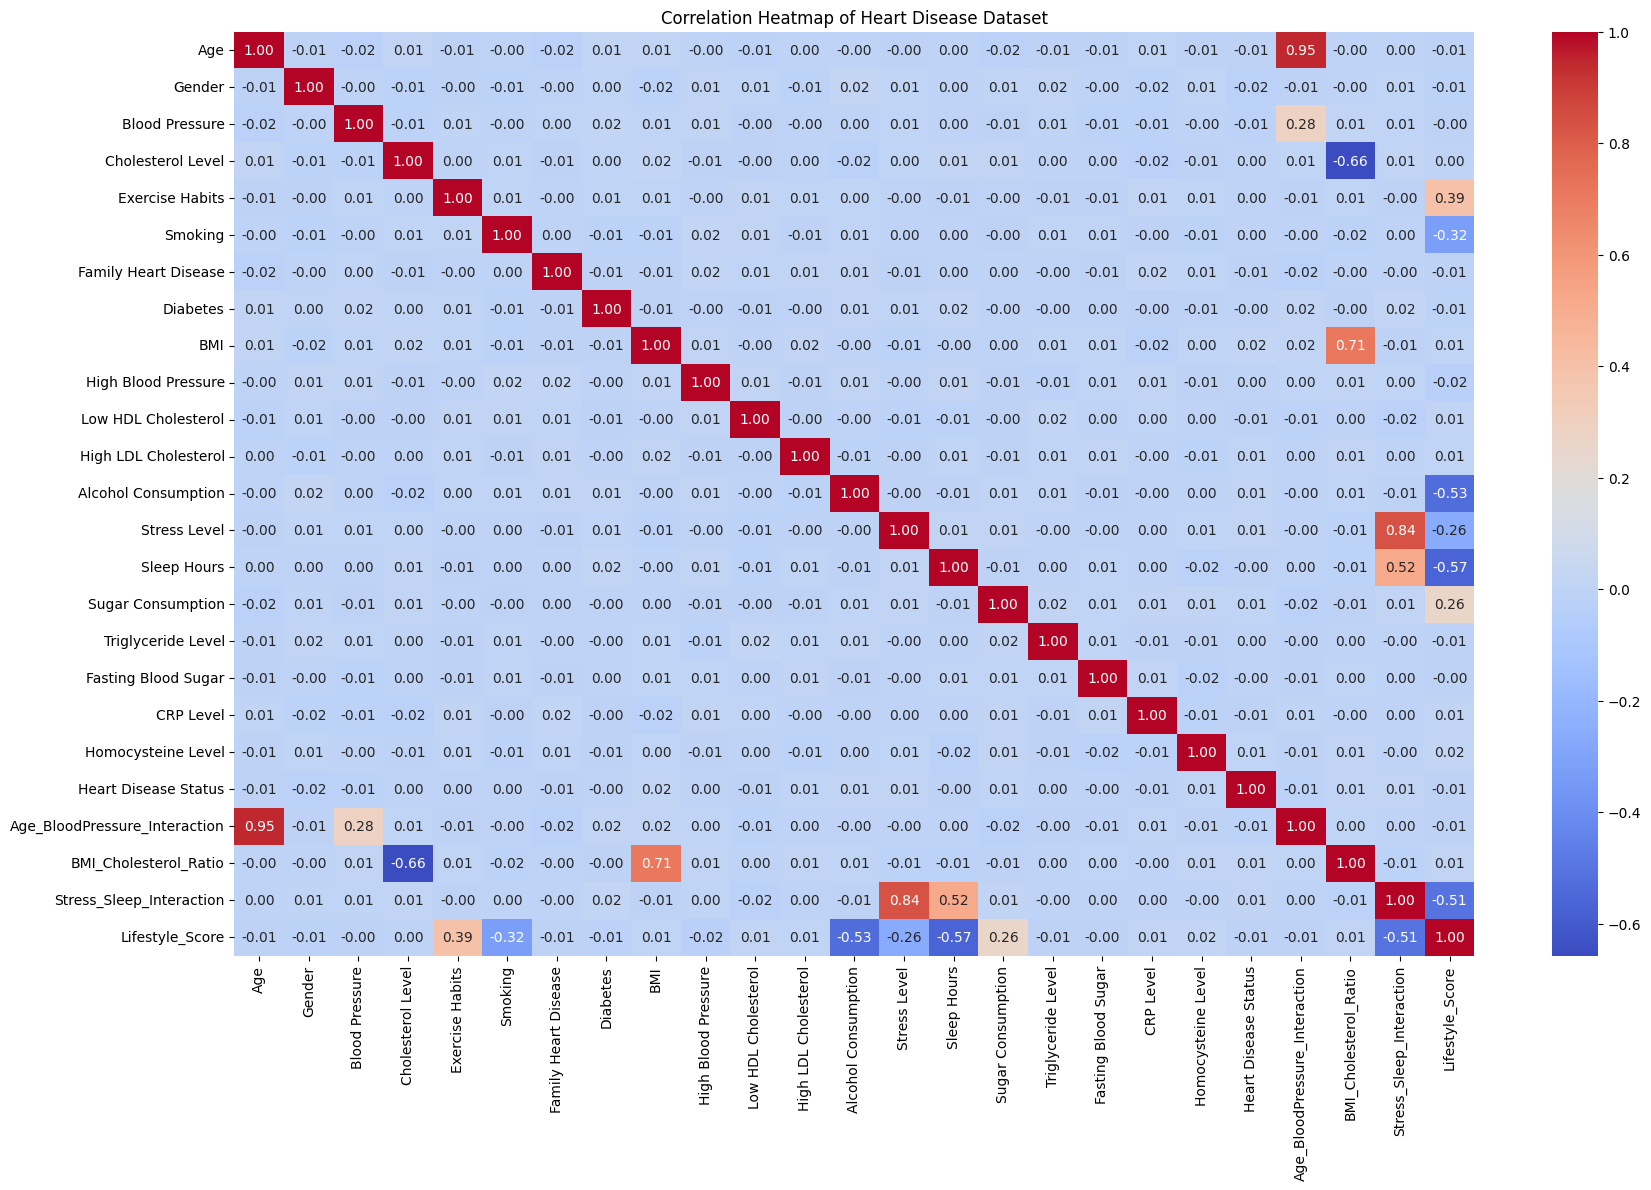

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

Temporarily Model to test whether the feature creation is effective


==================== Original Features (RF + ADASYN) ====================
Confusion Matrix:
[[1852  548]
 [ 462  138]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8003    0.7717    0.7857      2400
           1     0.2012    0.2300    0.2146       600

    accuracy                         0.6633      3000
   macro avg     0.5008    0.5008    0.5002      3000
weighted avg     0.6805    0.6633    0.6715      3000

Balanced Accuracy: 0.5008
ROC AUC: 0.5100
PR AUC: 0.2068

==================== Original + New Features (RF + ADASYN) ====================
Confusion Matrix:
[[2006  394]
 [ 487  113]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8047    0.8358    0.8199      2400
           1     0.2229    0.1883    0.2042       600

    accuracy                         0.7063      3000
   macro avg     0.5138    0.5121    0.5121      3000
weighted avg     0.6883    0.7063    0.6968      3

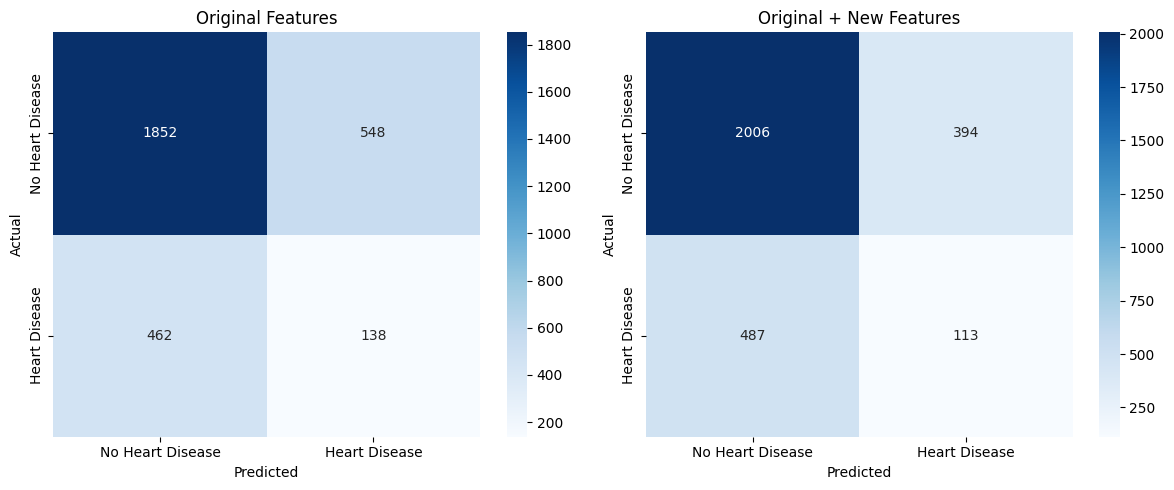

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score, average_precision_score
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline


df_temp = df.copy()  # avoid confict
target = "Heart Disease Status"

X_train, X_test, y_train, y_test = train_test_split(
    df_temp.drop(columns=[target]), df_temp[target],
    test_size=0.3, random_state=42, stratify=df_temp[target]
)

original_features = [
    'Age','Blood Pressure','BMI','Cholesterol Level',
    'Stress Level','Sleep Hours','Exercise Habits',
    'Smoking','Alcohol Consumption','Sugar Consumption'
]

new_features = original_features + [
    'Age_BloodPressure_Interaction',
    'BMI_Cholesterol_Ratio',
    'Stress_Sleep_Interaction',
    'Lifestyle_Score'
]

#pipeline function
def run_rf(X_train, X_test, y_train, y_test, desc):
    pipeline = ImbPipeline([
        ("adasyn", ADASYN(random_state=42)),
        ("rf", RandomForestClassifier(
            class_weight='balanced',
            max_depth=20,
            min_samples_split=2,
            n_estimators=200,
            random_state=42
        ))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]

    print(f"\n{'='*20} {desc} {'='*20}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    bal_acc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    return confusion_matrix(y_test, y_pred)

#confusion
cm_original = run_rf(X_train[original_features], X_test[original_features], y_train, y_test, "Original Features (RF + ADASYN)")
cm_new = run_rf(X_train[new_features], X_test[new_features], y_train, y_test, "Original + New Features (RF + ADASYN)")

#visual
labels = ["No Heart Disease", "Heart Disease"]

def plot_confusion(cm, title, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
plot_confusion(cm_original, "Original Features", axes[0])
plot_confusion(cm_new, "Original + New Features", axes[1])
plt.tight_layout()
plt.show()


Since apply the feature creation make the recall metrics decreasing. so we consider no train

In [ ]:
df = df.drop(columns=["Age_BloodPressure_Interaction","BMI_Cholesterol_Ratio","Stress_Sleep_Interaction","Lifestyle_Score"])

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Feature Scalar
Min Max Scalar

In [ ]:
print(f"\n{'='*50}")
print("FEATURE SCALING")
print(f"{'='*50}")

scaler = MinMaxScaler(feature_range=(0, 1))

# Create copies to avoid modifying original dataframes
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit scaler on numeric columns of training data
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

# Apply the same scaler on test data numeric columns
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print("Feature scaling completed using MinMaxScaler (0-1 range)")
print("Numeric columns scaled:", num_cols)

# Display scaling statistics
print("\nFeature min values (used for scaling):")
for feature, min_val in zip(num_cols, scaler.data_min_):
    print(f"{feature}: {min_val:.2f}")

print("\nFeature max values (used for scaling):")
for feature, max_val in zip(num_cols, scaler.data_max_):
    print(f"{feature}: {max_val:.2f}")


FEATURE SCALING
Feature scaling completed using MinMaxScaler (0-1 range)
Numeric columns scaled: ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

Feature min values (used for scaling):
Age: 18.00
Blood Pressure: 120.00
Cholesterol Level: 150.00
BMI: 18.00
Sleep Hours: 4.00
Triglyceride Level: 100.00
Fasting Blood Sugar: 80.00
CRP Level: 0.00
Homocysteine Level: 5.00

Feature max values (used for scaling):
Age: 80.00
Blood Pressure: 180.00
Cholesterol Level: 300.00
BMI: 40.00
Sleep Hours: 10.00
Triglyceride Level: 400.00
Fasting Blood Sugar: 160.00
CRP Level: 15.00
Homocysteine Level: 20.00


In [ ]:
# Export the fitted scaler
scaler_filename = 'minmax_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"\nMinMaxScaler exported to {scaler_filename}")


MinMaxScaler exported to minmax_scaler.joblib


In [ ]:
X_train_scaled.head()

Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
990   0.758065       0        0.133333           0.240000                1   
602   0.258065       1        0.633333           0.306667                3   
5716  0.838710       1        0.100000           0.620000                1   
2894  0.129032       1        0.050000           0.293333                2   
5573  0.419355       0        0.816667           0.006667                1   

      Smoking  Family Heart Disease  Diabetes       BMI  High Blood Pressure  \
990         1                     0         0  0.400385                    0   
602         0                     0         1  0.677542                    1   
5716        1                     0         0  0.172062                    0   
2894        1                     0         0  0.427831                    0   
5573        1                     1         1  0.601417                    1   

      Low HDL Cholesterol  High LDL Cholesterol  Alcohol Consumption  \
990                     1                     1                    3   
602                     1                     0                    0   
5716                    1                     1                    2   
2894                    1                     0                    0   
5573                    1                     1                    2   

      Stress Level  Sleep Hours  Sugar Consumption  Triglyceride Level  \
990              3     0.528922                  1            0.650000   
602              2     0.526662                  2            0.450000   
5716             2     0.300414                  2            0.863333   
2894             3     0.917941                  2            0.246667   
5573             2     0.069568                  2            0.890000   

      Fasting Blood Sugar  CRP Level  Homocysteine Level  
990                 0.075   0.540699            0.543179  
602                 0.825   0.248614            0.770602  
5716                0.950   0.881822            0.155606  
2894                0.775   0.298179            0.069552  
5573                1.000   0.865361            0.510934

## Feature Selection

Reminder - It is apply the feature selection on the train set only

Applying feature selection to the test data, or using the test data to inform feature selection, can lead to overfitting and unrealistic performance evaluations

### Random Forest


FEATURE SELECTION
All Features Ranked by Importance:
             feature  importance
                 BMI    0.097923
           CRP Level    0.096898
  Homocysteine Level    0.096190
         Sleep Hours    0.095313
  Triglyceride Level    0.088985
   Cholesterol Level    0.087361
 Fasting Blood Sugar    0.082438
                 Age    0.079451
      Blood Pressure    0.079278
 Alcohol Consumption    0.029120
     Exercise Habits    0.023074
   Sugar Consumption    0.021882
        Stress Level    0.021740
            Diabetes    0.015017
 Low HDL Cholesterol    0.014972
Family Heart Disease    0.014425
High LDL Cholesterol    0.014378
             Smoking    0.014046
 High Blood Pressure    0.013779
              Gender    0.013728

Top 10 Features Selected:
 1. BMI                       | 0.0979
 2. CRP Level                 | 0.0969
 3. Homocysteine Level        | 0.0962
 4. Sleep Hours               | 0.0953
 5. Triglyceride Level        | 0.0890
 6. Cholesterol Level         |

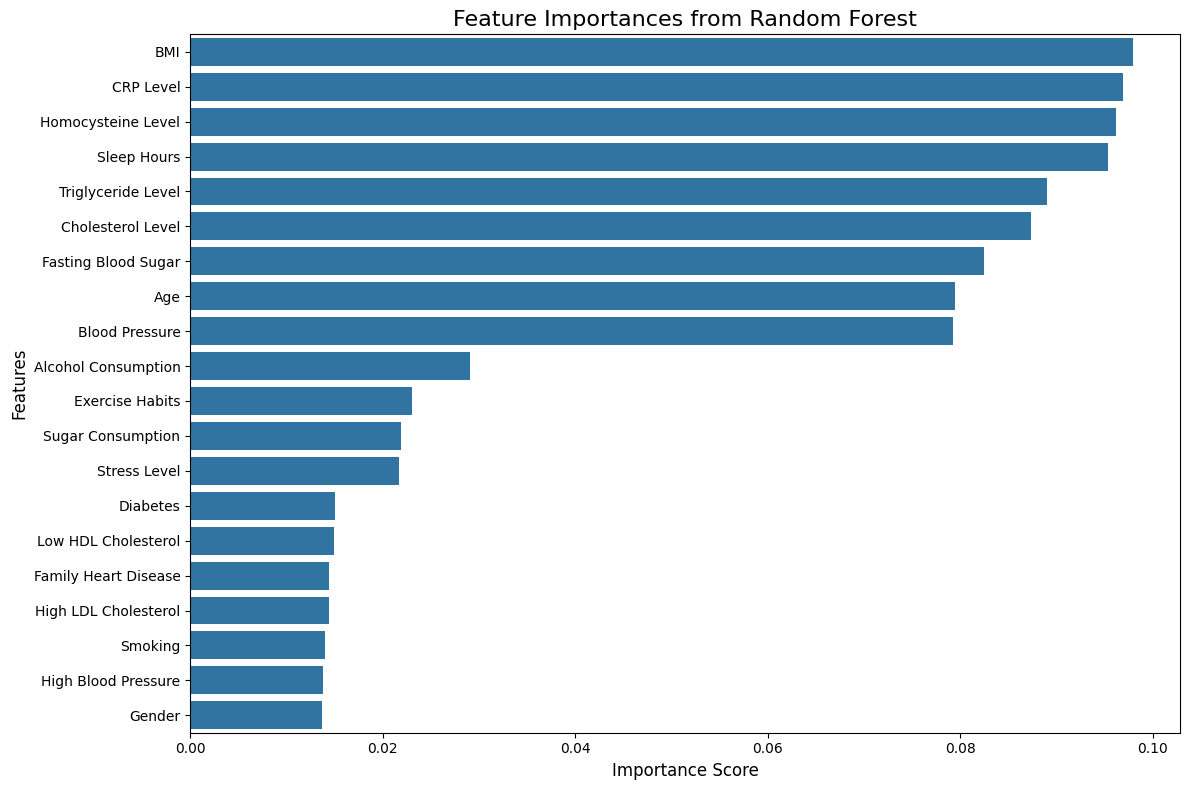

In [ ]:
print(f"\n{'='*50}")
print("FEATURE SELECTION")
print(f"{'='*50}")

# Train Random Forest for feature importance analysis
rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_feature_selector.fit(X_train_scaled, y_train)

# Extract feature importances
importances = rf_feature_selector.feature_importances_
feature_names = X_train_scaled.columns

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Get top 10 features
top_10_features = feature_importance_df.head(10)['feature'].tolist()

print("All Features Ranked by Importance:")
print(feature_importance_df.to_string(index=False))

print(f"\nTop 10 Features Selected:")
for i, feature in enumerate(top_10_features, 1):
    importance = feature_importance_df[feature_importance_df['feature'] == feature]['importance'].iloc[0]
    print(f"{i:2d}. {feature:<25} | {importance:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


## Imbalanced Data

### Adasyn

In [ ]:
print(y_train.value_counts())


Heart Disease Status
0    5600
1    1400
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import ADASYN
import pandas as pd

print(f"\nBefore ADASYN: {y_train.value_counts().to_dict()}")
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
print(f"After ADASYN: {pd.Series(y_train_resampled).value_counts().to_dict()}")



Before ADASYN: {0: 5600, 1: 1400}
After ADASYN: {1: 5675, 0: 5600}


# 4.0 Modeling

In [ ]:
#PREPARE FINAL TRAINING DATA
# Scale resampled training data
scaler_final = MinMaxScaler(feature_range=(0, 1))

X_train_final = X_train_resampled.copy()
X_train_final[num_cols] = scaler_final.fit_transform(X_train_resampled[num_cols])

# Scale test data
X_test_final = X_test.copy()
X_test_final[num_cols] = scaler_final.transform(X_test[num_cols])

# Select top 10 features
X_train_top10 = X_train_final[top_10_features]
X_test_top10 = X_test_final[top_10_features]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score,accuracy_score

## Shorthand function
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    # Calculate AUC score once and store it

    # Print evaluation results
    print(f"\n{'='*50}")
    print(f"{model_name.upper()} RESULTS - Test Data")
    print(f"{'='*50}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred,digits=4))

    # --- Generate and Plot Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.BuPu)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.grid(False)
    plt.show()

    # --- Generate and Plot ROC Curve ---
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC Score: {roc_auc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(5, 4))
    # Use the pre-calculated roc_auc score for the label
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, roc_auc, y_pred

## Random Forest


RANDOM FOREST RESULTS - Test Data
Accuracy: 0.6660
Precision: 0.4959
Recall: 0.4956
F1-Score: 0.4955

Classification Report:
              precision    recall  f1-score   support

           0     0.7982    0.7796    0.7888      2400
           1     0.1936    0.2117    0.2022       600

    accuracy                         0.6660      3000
   macro avg     0.4959    0.4956    0.4955      3000
weighted avg     0.6773    0.6660    0.6715      3000



<Figure size 800x600 with 0 Axes>

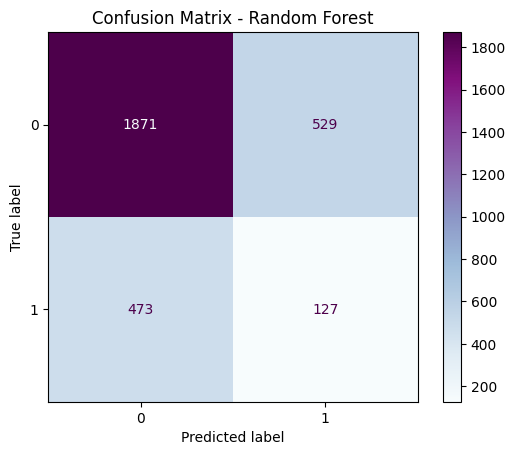

AUC Score: 0.4718


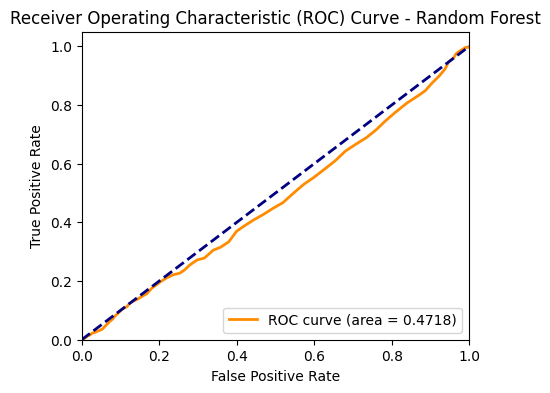

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_acc, rf_auc, rf_pred = evaluate_model(
    rf_model, "Random Forest",
    X_train_top10, y_train_resampled, X_test_top10, y_test
)

### GridSearchCV to find best parameters

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid_rf = {
#     "class_weight" : ['balanced'],
#     "n_estimators": [100, 200],
#     "max_depth": [10, 20],
#     "min_samples_split": [2, 5, 10],
#     "max_features":[0.5, 0.75, 1.0],
#     'random_state' : [42]
# }


# rf_model = RandomForestClassifier(random_state=42)
# grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="f1_macro", n_jobs=-1,verbose=4,refit=True)
# grid_search_rf.fit(X_train_top10, y_train_resampled)

# print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best Accuracy:", grid_search_rf.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 0.5, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Best Accuracy: 0.7561829646633725

### Cross Validation

In [ ]:
# from sklearn.model_selection import cross_validate

# grid_rf_model = RandomForestClassifier(
#     class_weight = 'balanced',
#     max_depth= 20,
#     max_features=0.5,
#     min_samples_split= 2,
#     n_estimators = 200,
#     random_state = 42
#     )

# def cross_validate_model(model, x_train, y_train, cv=5):
#     scoring = {
#         'accuracy': make_scorer(accuracy_score),
#         'precision': make_scorer(precision_score, average='weighted', zero_division=0),
#         'recall': make_scorer(recall_score, average='weighted', zero_division=0),
#         'f1_score': make_scorer(f1_score, average='weighted', zero_division=0)
#     }

#     cv_results = cross_validate(model, x_train, y_train, cv=cv, scoring=scoring)

#     print(f"Cross-Validation Results for {model.__class__.__name__}:\n")
#     print(f"Average Accuracy: {cv_results['test_accuracy'].mean():.4f}")
#     print(f"Average Precision: {cv_results['test_precision'].mean():.4f}")
#     print(f"Average Recall: {cv_results['test_recall'].mean():.4f}")
#     print(f"Average F1-Score: {cv_results['test_f1_score'].mean():.4f}")
#     print("="*50, "\n")

# X_resampled, y_resampled = adasyn.fit_resample(X, y)
# print(f"After ADASYN: {pd.Series(y_train_resampled).value_counts().to_dict()}")
# X_resampled = scaler_final.fit_transform(X_resampled[top_10_features])

# cross_validate_model(grid_rf_model, X_train_top10, y_train_resampled, cv=5)

After ADASYN: {1: 5675, 0: 5600}
Cross-Validation Results for RandomForestClassifier:

Average Accuracy: 0.7580
Average Precision: 0.7655
Average Recall: 0.7580
Average F1-Score: 0.7562



### Results


RANDOM FOREST RESULTS - Test Data
Accuracy: 0.6303
Precision: 0.4936
Recall: 0.4921
F1-Score: 0.4892

Classification Report:
              precision    recall  f1-score   support

           0     0.7965    0.7225    0.7577      2400
           1     0.1908    0.2617    0.2207       600

    accuracy                         0.6303      3000
   macro avg     0.4936    0.4921    0.4892      3000
weighted avg     0.6754    0.6303    0.6503      3000



<Figure size 800x600 with 0 Axes>

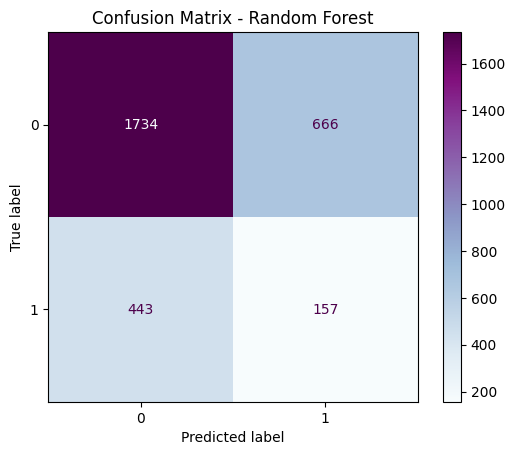

AUC Score: 0.4721


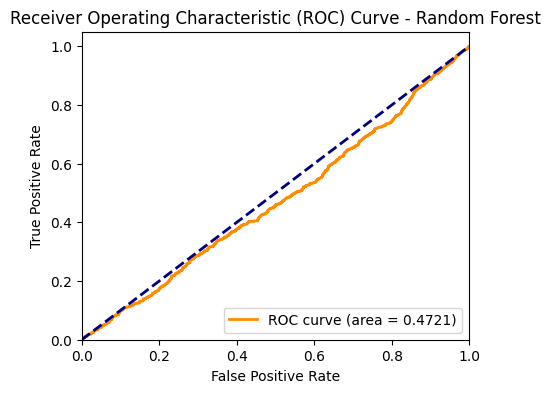

In [ ]:

grid_rf_model = RandomForestClassifier(
    class_weight = 'balanced',
    max_depth= 20,
    max_features=0.5,
    min_samples_split= 2,
    n_estimators = 200,
    random_state = 42
    )

rf_acc, rf_auc, rf_pred = evaluate_model(
    grid_rf_model, "Random Forest",
    X_train_top10, y_train_resampled, X_test_top10, y_test
)

In [ ]:
# Export the trained model
filename = 'rf.joblib'
joblib.dump(grid_rf_model, filename)
print(f"\nRandom Forest model exported to {filename}")


Random Forest model exported to rf.joblib


## Naive Bayes

Best Parameters (Bernoulli NB): {'alpha': 10, 'binarize': 0.25, 'fit_prior': False}
Cross-Val Best Score: 0.5558314855875832

BERNOULLI NB RESULTS - Test Data
Accuracy: 0.5277
Precision: 0.4942
Recall: 0.4910
F1-Score: 0.4593

Classification Report:
              precision    recall  f1-score   support

           0     0.7948    0.5521    0.6516      2400
           1     0.1935    0.4300    0.2669       600

    accuracy                         0.5277      3000
   macro avg     0.4942    0.4910    0.4593      3000
weighted avg     0.6746    0.5277    0.5747      3000



<Figure size 800x600 with 0 Axes>

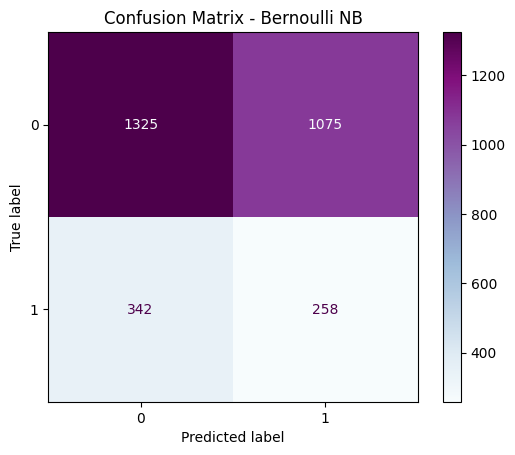

AUC Score: 0.4914


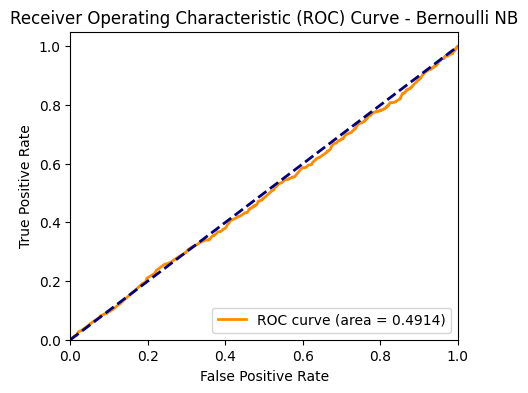

Best Parameters (Gaussian NB): {'var_smoothing': 1e-12}
Cross-Val Best Score: 0.6278492239467849

GAUSSIAN NB RESULTS - Test Data
Accuracy: 0.5313
Precision: 0.4908
Recall: 0.4858
F1-Score: 0.4582

Classification Report:
              precision    recall  f1-score   support

           0     0.7920    0.5617    0.6572      2400
           1     0.1895    0.4100    0.2592       600

    accuracy                         0.5313      3000
   macro avg     0.4908    0.4858    0.4582      3000
weighted avg     0.6715    0.5313    0.5776      3000



<Figure size 800x600 with 0 Axes>

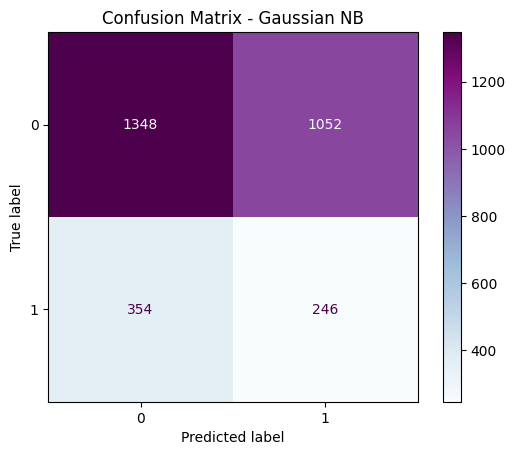

AUC Score: 0.4744


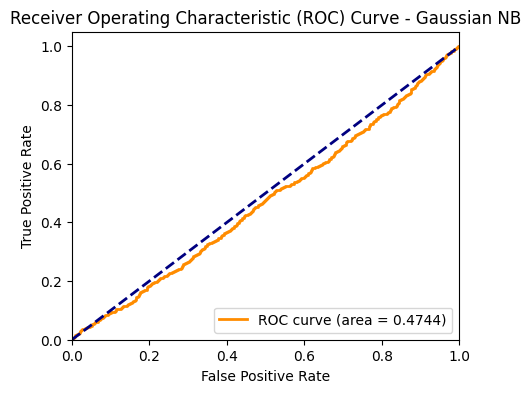

Best Parameters (Multinomia lNB): {'alpha': 0.01, 'fit_prior': True}
Cross-Val Best Score: 0.5567184035476719

MULTINOMIAL NB RESULTS - Test Data
Accuracy: 0.4780
Precision: 0.4848
Recall: 0.4763
F1-Score: 0.4305

Classification Report:
              precision    recall  f1-score   support

           0     0.7844    0.4792    0.5949      2400
           1     0.1851    0.4733    0.2662       600

    accuracy                         0.4780      3000
   macro avg     0.4848    0.4763    0.4305      3000
weighted avg     0.6646    0.4780    0.5292      3000



<Figure size 800x600 with 0 Axes>

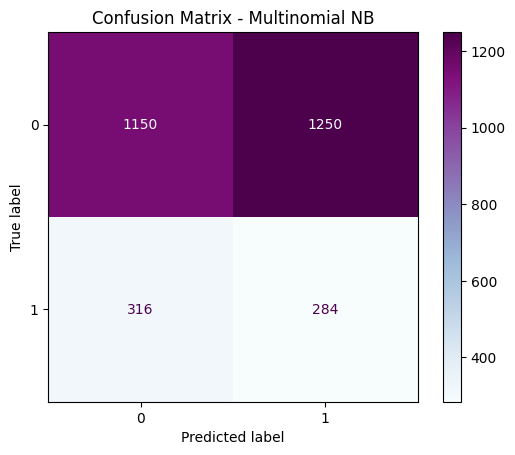

AUC Score: 0.4736


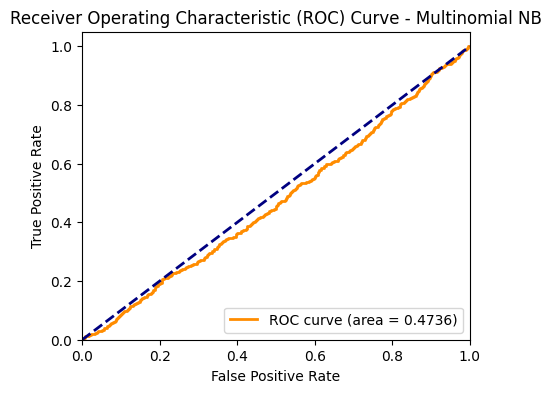

(0.478, np.float64(0.47360902777777775), array([0, 1, 1, ..., 1, 1, 1]))

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    make_scorer, precision_score, recall_score, f1_score, accuracy_score,
    classification_report, roc_auc_score
)
import matplotlib.pyplot as plt


# Bernoulli Naive Bayes
param_grid_bnb = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
    'binarize': [0.0, 0.25, 0.5, 1.0, None],
    'fit_prior': [True, False]
}
bnb = BernoulliNB()
grid_bnb = GridSearchCV(bnb, param_grid_bnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_bnb.fit(X_train_top10, y_train_resampled)
best_bnb = grid_bnb.best_estimator_
print("Best Parameters (Bernoulli NB):", grid_bnb.best_params_)
print("Cross-Val Best Score:", grid_bnb.best_score_)
evaluate_model(best_bnb, "Bernoulli NB", X_train_top10, y_train_resampled, X_test_top10, y_test)


# Gaussian Naive Bayes
param_grid_gnb = {
    'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
}
gnb = GaussianNB()
grid_gnb = GridSearchCV(gnb, param_grid_gnb, cv=5, scoring='accuracy')
grid_gnb.fit(X_train_top10, y_train_resampled)
best_gnb = grid_gnb.best_estimator_
print("Best Parameters (Gaussian NB):", grid_gnb.best_params_)
print("Cross-Val Best Score:", grid_gnb.best_score_)
evaluate_model(best_gnb, "Gaussian NB", X_train_top10, y_train_resampled, X_test_top10, y_test)



# Multinomial Naive Bayes

param_grid_mnb = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
    'fit_prior': [True, False]
}
mnb = MultinomialNB()
grid_mnb = GridSearchCV(mnb, param_grid_mnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_mnb.fit(X_train_top10, y_train_resampled)
best_mnb = grid_mnb.best_estimator_
print("Best Parameters (Multinomia lNB):", grid_mnb.best_params_)
print("Cross-Val Best Score:", grid_mnb.best_score_)
evaluate_model(best_mnb, "Multinomial NB", X_train_top10, y_train_resampled, X_test_top10, y_test)


## K-Nearest Neighbor(KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Basic KNN Model

Starts with a simple k=5 model for baseline comparison


KNN BASIC (K=5) RESULTS - Test Data
Accuracy: 0.5007
Precision: 0.4858
Recall: 0.4779
F1-Score: 0.4418

Classification Report:
              precision    recall  f1-score   support

           0     0.7865    0.5158    0.6230      2400
           1     0.1851    0.4400    0.2606       600

    accuracy                         0.5007      3000
   macro avg     0.4858    0.4779    0.4418      3000
weighted avg     0.6663    0.5007    0.5506      3000



<Figure size 800x600 with 0 Axes>

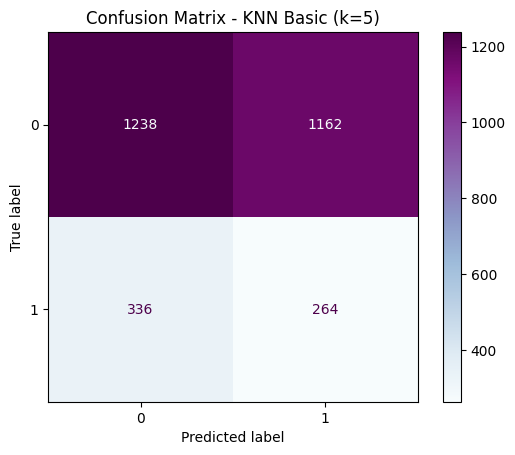

AUC Score: 0.4748


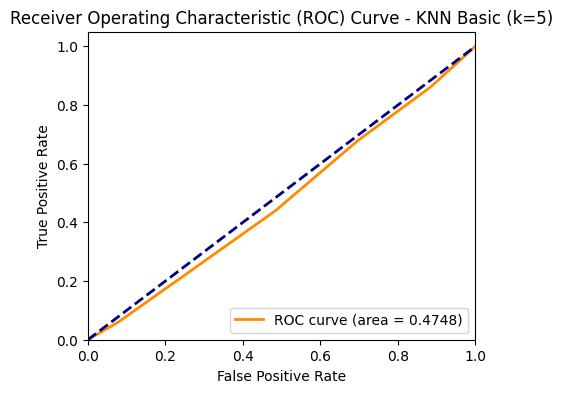

In [ ]:
knn_basic = KNeighborsClassifier(
    n_neighbors=5
    )

knn_acc, knn_auc, knn_pred = evaluate_model(
    knn_basic, "KNN Basic (k=5)",
    X_train_top10, y_train_resampled, X_test_top10, y_test
)

### Hyperparameter Tuning

Uses GridSearchCV to find optimal parameters:

n_neighbors: Tests different k values (3, 5, 7, 9, 11, 13, 15)

weights: Tests uniform vs distance weighting

metric: Tests euclidean, manhattan, and minkowski distances

p: Parameter for minkowski metric

-->Define parameter grid for KNN

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Only used when metric='minkowski'
}


In [ ]:
knn = KNeighborsClassifier()

# Perform Grid Search
print("Performing Grid Search... This may take a few minutes.")
grid_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train_top10, y_train_resampled)

# Get best model
best_knn = grid_knn.best_estimator_

print(f"\nBest Parameters for KNN: {grid_knn.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_knn.best_score_:.4f}")

Performing Grid Search... This may take a few minutes.
Fitting 5 folds for each of 84 candidates, totalling 420 fits

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Cross-Validation F1 Score: 0.7088


### Comprehensive Evaluation


KNN BEST (GRID SEARCH) RESULTS - Test Data
Accuracy: 0.5273
Precision: 0.4900
Recall: 0.4846
F1-Score: 0.4561

Classification Report:
              precision    recall  f1-score   support

           0     0.7912    0.5558    0.6530      2400
           1     0.1887    0.4133    0.2591       600

    accuracy                         0.5273      3000
   macro avg     0.4900    0.4846    0.4561      3000
weighted avg     0.6707    0.5273    0.5742      3000



<Figure size 800x600 with 0 Axes>

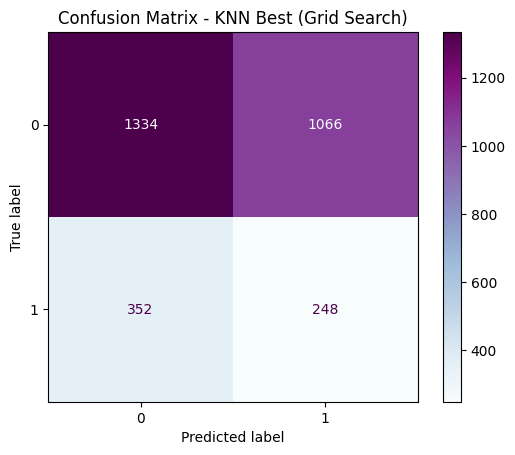

AUC Score: 0.4831


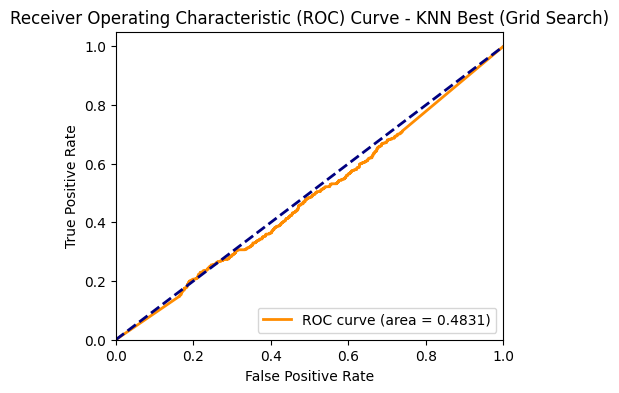

In [ ]:
knn_best_acc, knn_best_auc, knn_best_pred = evaluate_model(
    best_knn, "KNN Best (Grid Search)",
    X_train_top10, y_train_resampled, X_test_top10, y_test
)

### Cross-Validation

5-fold cross-validation to assess model stability

In Order to Ensures the model generalizes well

In [ ]:
cross_validate_model(best_knn, X_train_top10, y_train_resampled, cv=5)

Cross-Validation Results for KNeighborsClassifier:

Average Accuracy: 0.7180
Average Precision: 0.7465
Average Recall: 0.7180
Average F1-Score: 0.7091



### Analysis of different k values

Tests different k values to show their impact on performance

k= 3: Accuracy=0.5263, F1=0.2595
k= 5: Accuracy=0.5013, F1=0.2616
k= 7: Accuracy=0.4890, F1=0.2612
k= 9: Accuracy=0.4850, F1=0.2681
k=11: Accuracy=0.4793, F1=0.2721
k=13: Accuracy=0.4777, F1=0.2809
k=15: Accuracy=0.4750, F1=0.2825


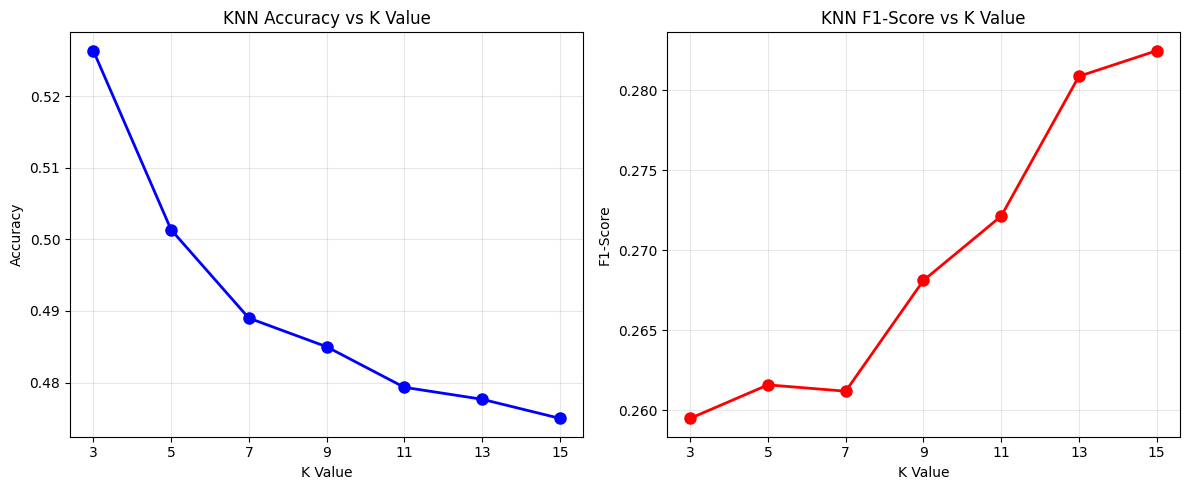


Best k value based on accuracy: 3
Best k value based on F1-score: 15


In [ ]:
k_values = [3, 5, 7, 9, 11, 13, 15]
k_scores = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    knn_k.fit(X_train_top10, y_train_resampled)
    y_pred_k = knn_k.predict(X_test_top10)
    accuracy_k = accuracy_score(y_test, y_pred_k)
    f1_k = f1_score(y_test, y_pred_k)
    k_scores.append({'k': k, 'accuracy': accuracy_k, 'f1': f1_k})
    print(f"k={k:2d}: Accuracy={accuracy_k:.4f}, F1={f1_k:.4f}")

# Plot k values vs performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
accuracies = [score['accuracy'] for score in k_scores]
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.title('KNN Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

plt.subplot(1, 2, 2)
f1_scores = [score['f1'] for score in k_scores]
plt.plot(k_values, f1_scores, 'ro-', linewidth=2, markersize=8)
plt.title('KNN F1-Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1-Score')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

plt.tight_layout()
plt.show()

print(f"\nBest k value based on accuracy: {k_values[np.argmax(accuracies)]}")
print(f"Best k value based on F1-score: {k_values[np.argmax(f1_scores)]}")

### Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(
    best_knn, X_test_top10, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Create feature importance dataframe
feature_importance_knn = pd.DataFrame({
    'feature': X_test_top10.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("Feature Importance (Permutation-based):")
print(feature_importance_knn)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_knn)), feature_importance_knn['importance_mean'])
plt.yticks(range(len(feature_importance_knn)), feature_importance_knn['feature'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for KNN Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Feature Importance (Permutation-based):
               feature  importance_mean  importance_std
6  Fasting Blood Sugar         0.003733        0.008469
9  Alcohol Consumption         0.002300        0.006360
8       Blood Pressure         0.001967        0.006961
7                  Age        -0.002733        0.007261
4   Triglyceride Level        -0.003533        0.008241
3          Sleep Hours        -0.004200        0.007654
0                  BMI        -0.004967        0.006165
1            CRP Level        -0.005333        0.006309
2   Homocysteine Level        -0.005900        0.004681
5    Cholesterol Level        -0.008367        0.006651


## Gradient Boosting


GRADIENT BOOSTING CLASSIFIER RESULTS - Test Data
Accuracy: 0.5770
Precision: 0.4939
Recall: 0.4912
F1-Score: 0.4768

Classification Report:
              precision    recall  f1-score   support

           0     0.7956    0.6342    0.7058      2400
           1     0.1923    0.3483    0.2478       600

    accuracy                         0.5770      3000
   macro avg     0.4939    0.4912    0.4768      3000
weighted avg     0.6749    0.5770    0.6142      3000



<Figure size 800x600 with 0 Axes>

AUC Score: 0.4845


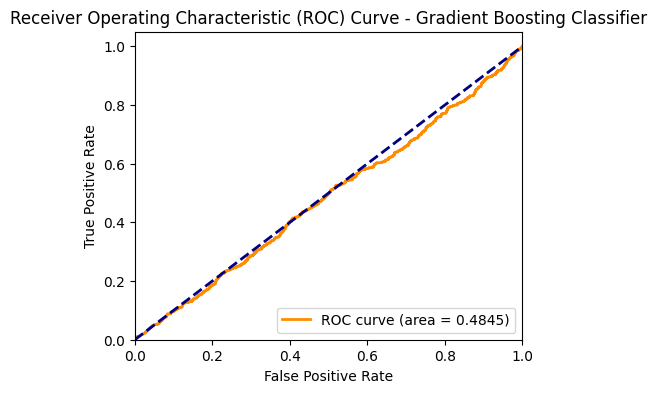

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- 4. Train Gradient Boosting ---
gb_clf = GradientBoostingClassifier(
    n_estimators=200,  # number of boosting stages
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_acc, gb_auc, gb_pred = evaluate_model(
    gb_clf, "Gradient Boosting Classifier",
    X_train_top10, y_train_resampled, X_test_top10, y_test
)


XGBOOST CLASSIFIER RESULTS - Test Data
Accuracy: 0.6043
Precision: 0.4913
Recall: 0.4883
F1-Score: 0.4818

Classification Report:
              precision    recall  f1-score   support

           0     0.7946    0.6817    0.7338      2400
           1     0.1881    0.2950    0.2297       600

    accuracy                         0.6043      3000
   macro avg     0.4913    0.4883    0.4818      3000
weighted avg     0.6733    0.6043    0.6330      3000



<Figure size 800x600 with 0 Axes>

AUC Score: 0.4867


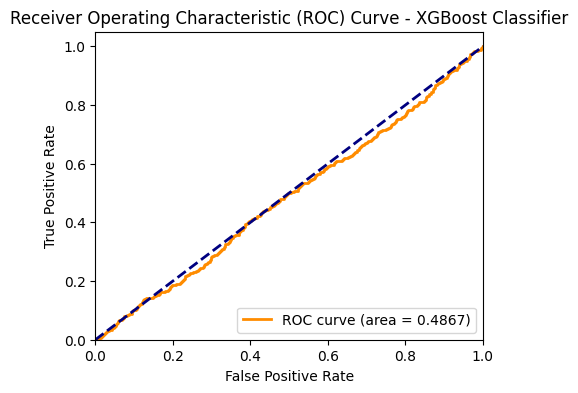

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_acc, xgb_auc, xgb_pred = evaluate_model(
    xgb_clf, "XGBoost Classifier",
    X_train_top10, y_train_resampled, X_test_top10, y_test
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5675, number of negative: 5600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 11275, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503326 -> initscore=0.013304
[LightGBM] [Info] Start training from score 0.013304

LIGHTBOOST CLASSIFIER RESULTS - Test Data
Accuracy: 0.7403
Precision: 0.5004
Recall: 0.5002
F1-Score: 0.4904

Classification Report:
              precision    recall  f1-score   support

           0     0.8001    0.9004    0.8473      2400
           1     0.2007    0.1000    0.1335       600

    accuracy                         0.7403      3000
   macro avg  

<Figure size 800x600 with 0 Axes>

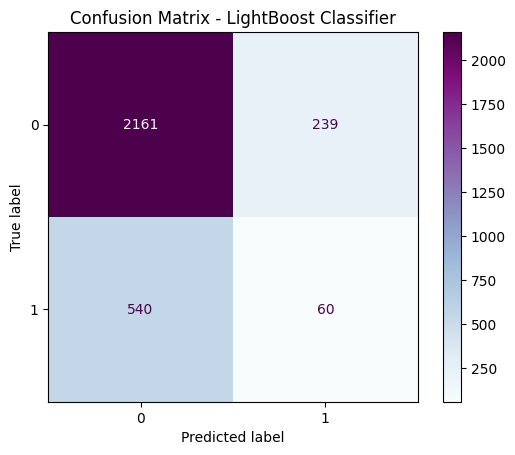

AUC Score: 0.4858


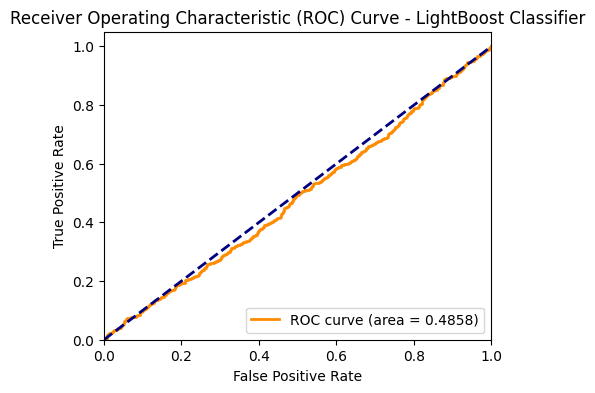

In [ ]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgb_acc, lgb_auc, lgb_pred = evaluate_model(
    lgb_clf, "LightBoost Classifier",
    X_train_top10, y_train_resampled, X_test_top10, y_test
)

In [ ]:
X_train_top10.columns

Index(['BMI', 'CRP Level', 'Homocysteine Level', 'Sleep Hours',
       'Triglyceride Level', 'Cholesterol Level', 'Fasting Blood Sugar', 'Age',
       'Blood Pressure', 'Alcohol Consumption'],
      dtype='object')

In [ ]:
# Save the trained model to a file
model_filename = 'lgb.pkl'
joblib.dump(lgb_clf, model_filename)
print(f"LightGBM classifier saved to {model_filename}")

LightGBM classifier saved to lgb.pkl


In [ ]:
# Load the saved model
reg = joblib.load('lgb.pkl')
print("LightGBM classifier loaded successfully.")

LightGBM classifier loaded successfully.


In [ ]:
reg.predict(X_test_top10)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#============================
#   Test the loaded model
#============================

y_pred = reg.predict(X_test_top10)
y_pred_proba = reg.predict_proba(X_test_top10)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation results
print(f"\n{'='*50}")
print(f"{str(type(reg)).upper()} RESULTS - Test Data")
print(f"{'='*50}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred,digits=4))


<CLASS 'LIGHTGBM.SKLEARN.LGBMCLASSIFIER'> RESULTS - Test Data
Accuracy: 0.7403
Precision: 0.5004
Recall: 0.5002
F1-Score: 0.4904

Classification Report:
              precision    recall  f1-score   support

           0     0.8001    0.9004    0.8473      2400
           1     0.2007    0.1000    0.1335       600

    accuracy                         0.7403      3000
   macro avg     0.5004    0.5002    0.4904      3000
weighted avg     0.6802    0.7403    0.7045      3000



###Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# 定义模型
gb_clf = GradientBoostingClassifier(random_state=42)

# 定义搜索范围
param_grid = {
    "n_estimators": [200, 300, 400],   # 树的数量
    "learning_rate": [0.01, 0.05, 0.1],  # 学习率
    "max_depth": [2, 3, 5],             # 每棵树的深度
}

# 设置 GridSearchCV
gb_grid = GridSearchCV(
    gb_clf,
    param_grid,
    scoring="f1_macro",   # 你可以换成 "roc_auc" 或 "accuracy"
    # cv=3,                 # 5 折交叉验证
    cv=5,                 # 5 折交叉验证
    n_jobs=-1,            # 并行跑
    verbose=2
)

# 训练
gb_grid.fit(X_train_top10, y_train_resampled)

print("Best Parameters:", gb_grid.best_params_)
print("Best CV Score:", gb_grid.best_score_)

# 在测试集上评估
best_gb = gb_grid.best_estimator_
y_pred = best_gb.predict(X_test_top10)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
y_pred_proba = best_gb.predict_proba(X_test_top10)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
Best CV Score: 0.7987981503707108
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2400
           1       0.15      0.06      0.09       600

    accuracy                           0.74      3000
   macro avg       0.47      0.49      0.47      3000
weighted avg       0.67      0.74      0.70      3000

AUC: 0.49146458333333337


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(random_state=42)

# 定义搜索范围
param_grid = {
    "n_estimators": [200, 300, 400],   # 树的数量
    "learning_rate": [0.01, 0.05, 0.1],  # 学习率
    "max_depth": [2, 3, 5],             # 每棵树的深度
}

# 设置 GridSearchCV
xgb_grid = GridSearchCV(
    xgb_clf,
    param_grid,
    scoring="f1_macro",   # 你可以换成 "roc_auc" 或 "accuracy"
    cv=5,                 # 5 折交叉验证
    n_jobs=-1,            # 并行跑
    verbose=2
)

# 训练
xgb_grid.fit(X_train_top10, y_train_resampled)

print("Best Parameters:", xgb_grid.best_params_)
print("Best CV Score:", xgb_grid.best_score_)

# 在测试集上评估
best_xgb = xgb_grid.best_estimator_
y_pred = best_xgb.predict(X_test_top10)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
y_pred_proba = best_xgb.predict_proba(X_test_top10)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
Best CV Score: 0.7701203452470458
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2400
           1       0.20      0.18      0.19       600

    accuracy                           0.69      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.68      0.69      0.69      3000

AUC: 0.4892652777777778


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

lgb_clf = lgb.LGBMClassifier(random_state=42)

# 定义搜索范围
param_grid = {
    "n_estimators": [200, 300, 400],   # 树的数量
    "learning_rate": [0.01, 0.05, 0.1],  # 学习率
    "max_depth": [-1, 2, 3, 5],             # 每棵树的深度
}

# 设置 GridSearchCV
lgb_grid = GridSearchCV(
    lgb_clf,
    param_grid,
    scoring="f1_macro",   # 你可以换成 "roc_auc" 或 "accuracy"
    cv=5,                 # 5 折交叉验证
    n_jobs=-1,            # 并行跑
    verbose=2
)

# 训练
lgb_grid.fit(X_train_top10, y_train_resampled)

print("Best Parameters:", lgb_grid.best_params_)
print("Best CV Score:", lgb_grid.best_score_)

# 在测试集上评估
best_lgb = lgb_grid.best_estimator_
y_pred = best_lgb.predict(X_test_top10)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
y_pred_proba = best_lgb.predict_proba(X_test_top10)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5675, number of negative: 5600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 11275, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503326 -> initscore=0.013304
[LightGBM] [Info] Start training from score 0.013304
Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 400}
Best CV Score: 0.8012946069330582
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2400
           1       0.18      0.07      0.10       600

    accuracy                           0.75      3000
   macro avg       0.49      0.49     

###Cross-Validation

In [ ]:
cross_validate_model(best_gb, X_train_top10, y_train_resampled, cv=5)

Cross-Validation Results for GradientBoostingClassifier:

Average Accuracy: 0.8259
Average Precision: 0.8462
Average Recall: 0.8259
Average F1-Score: 0.7984



In [ ]:
cross_validate_model(best_xgb, X_train_top10, y_train_resampled, cv=5)

Cross-Validation Results for XGBClassifier:

Average Accuracy: 0.7813
Average Precision: 0.7959
Average Recall: 0.7813
Average F1-Score: 0.7700



In [ ]:
cross_validate_model(best_lgb, X_train_top10, y_train_resampled, cv=5)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4540, number of negative: 4480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 9020, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503326 -> initscore=0.013304
[LightGBM] [Info] Start training from score 0.013304
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4540, number of negative: 4480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Numb

# Conclusion

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the results
models = [
    'LightGBM', 'Random Forest', 'XGBoost', 'Gradient Boosting',
    'Gaussian NB', 'Bernoulli NB', 'KNN', 'Multinomial NB'
]

accuracy = [0.7403, 0.6303, 0.6043, 0.5770, 0.5313, 0.5277, 0.5273, 0.4780]
precision = [0.5004, 0.4936, 0.4913, 0.4939, 0.4908, 0.4942, 0.4900, 0.4848]
recall = [0.5002, 0.4921, 0.4883, 0.4912, 0.4858, 0.4910, 0.4846, 0.4763]
f1_score = [0.4904, 0.4892, 0.4818, 0.4768, 0.4582, 0.4593, 0.4561, 0.4305]
auc_score = [0.4858, 0.4721, 0.4867, 0.4845, 0.4744, 0.4914, 0.4831, 0.4736]

# Set up the plot
x = np.arange(len(models))  # the label locations
width = 0.17  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))

# Creates the bar for each metric
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x - width, precision, width, label='Precision', color='lightgreen')
rects3 = ax.bar(x, recall, width, label='Recall', color='salmon')
rects4 = ax.bar(x + width, f1_score, width, label='F1-Score', color='gold')
rects5 = ax.bar(x + 2*width, auc_score, width, label='AUC Score', color='mediumpurple')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Heart Disease Prediction Model Comparison (Test Data)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend(fontsize=12)

# Set y-axis limits to better visualize the differences
ax.set_ylim([0, 1.0])

# Add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

# Display the plot
plt.show()